In [1]:
ROOT::RDataFrame dataframe("tree1","experiment.root");

In [2]:
// Define a number to compute the energy lost by the particle
float eloss_func(float beamEnergy, float xmom, float ymom, float zmom) {
    float Emeas = sqrt(xmom*xmom + ymom*ymom + zmom*zmom);
    float Eloss = beamEnergy - Emeas;
    return Eloss;
}

In [3]:
float pt_func( float xmom, float ymom ) {
    return sqrt(xmom*xmom + ymom*ymom );
}

In [4]:
auto eloss_df = dataframe.Define("eloss",eloss_func,{"ebeam","px","py","pz"}).Histo1D("eloss");

In [5]:
auto pt_dataframe = dataframe.Define("pt",pt_func,{"px","py"});
auto pt_hist = pt_dataframe.Histo1D("pt");
auto pt_count = pt_dataframe.Filter("pz < 145").Count();

In [6]:
TCanvas myCanvas;
eloss_df->Draw();

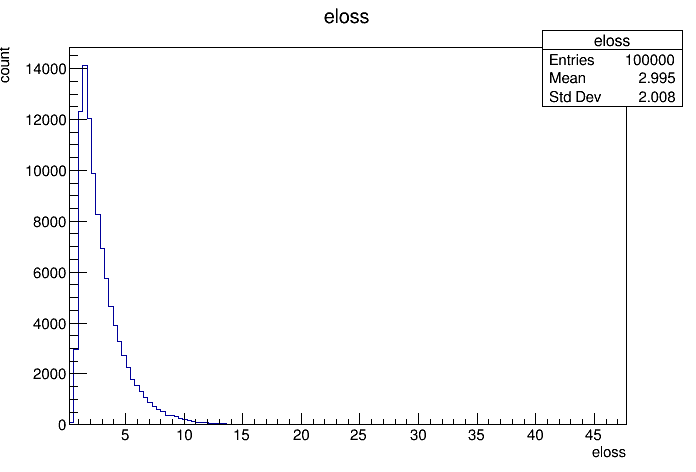

In [7]:
myCanvas.Draw();

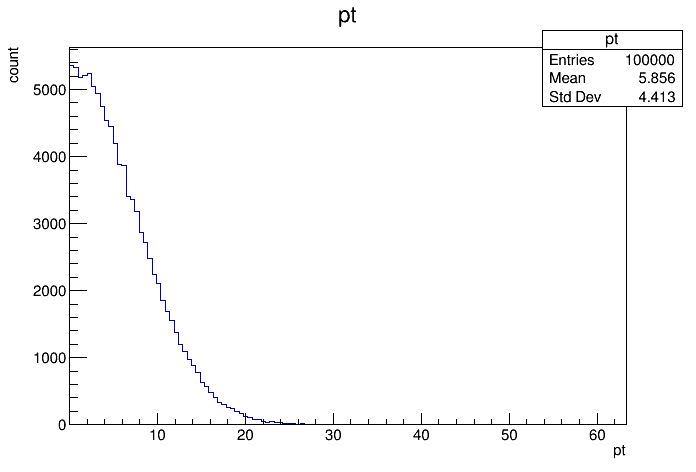

pt count = 14962


In [8]:
TCanvas canvas1;
pt_hist->Draw();
canvas1.Draw();
std::cout << "pt count = " << pt_count.GetValue() << std::endl;

In [9]:
ROOT::RDF::SaveGraph(dataframe)

(std::string) "digraph {
	3 [label="Count\n(already run)", style="filled", fillcolor="#e6e5e6", shape="box"];
	1 [label="Filter", style="filled", fillcolor="#0f9d58", shape="hexagon"];
	2 [label="Define\npt", style="filled", fillcolor="#4285f4", shape="ellipse"];
	0 [label="tree1", style="filled", fillcolor="#f4b400", shape="ellipse"];
	4 [label="TH1D\neloss\n(already run)", style="filled", fillcolor="#e6e5e6", shape="box"];
	5 [label="Define\neloss", style="filled", fillcolor="#4285f4", shape="ellipse"];
	6 [label="TH1D\npt\n(already run)", style="filled", fillcolor="#e6e5e6", shape="box"];
	1 -> 3;
	2 -> 1;
	0 -> 2;
	5 -> 4;
	0 -> 5;
	2 -> 6;
}"


In [10]:
// Had to install graphviz on all the cluster nodes to be able to display the .dot file.
ROOT::RDF::SaveGraph(dataframe, "./dataframe.dot");

In [11]:
dataframe.GetColumnNames()

(ROOT::RDF::ColumnNames_t) { "chi2", "ebeam", "event", "px", "py", "pz", "zv" }


In [12]:
dataframe.Describe()

(ROOT::RDF::RDFDescription) Dataframe from TChain tree1 in file experiment.root

Property                Value
--------                -----
Columns in total            7
Columns from defines        0
Event loops run             1
Processing slots            1

Column  Type    Origin
------  ----    ------
chi2    Float_t Dataset
ebeam   Float_t Dataset
event   Int_t   Dataset
px      Float_t Dataset
py      Float_t Dataset
pz      Float_t Dataset
zv      Float_t Dataset


In [13]:
dataframe.Display()->Print()

+-----+-----------+----------+-------+------------+-----------+----------+-----------+
| Row | chi2      | ebeam    | event | px         | py        | pz       | zv        | 
+-----+-----------+----------+-------+------------+-----------+----------+-----------+
| 0   | 0.940583f | 150.140f | 0     | 14.3336f   | -4.02104f | 143.544f | 22.2641f  | 
+-----+-----------+----------+-------+------------+-----------+----------+-----------+
| 1   | 1.02056f  | 149.786f | 1     | 0.0509291f | -1.37331f | 148.600f | 0.614076f | 
+-----+-----------+----------+-------+------------+-----------+----------+-----------+
| 2   | 0.893446f | 150.162f | 2     | 4.00793f   | 3.88983f  | 145.688f | 16.5690f  | 
+-----+-----------+----------+-------+------------+-----------+----------+-----------+
| 3   | 1.02172f  | 150.142f | 3     | 1.45592f   | 4.66344f  | 146.706f | 11.4663f  | 
+-----+-----------+----------+-------+------------+-----------+----------+-----------+
| 4   | 0.854095f | 149.942f | 4     |

In [14]:
histdf = dataframe.Histo1D("px")

(ROOT::RDF::RResultPtr<TH1D> &) @0x7f9d282f7000


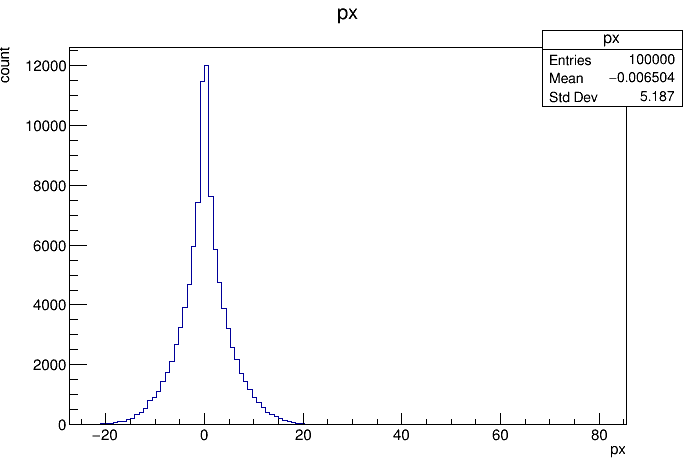

In [15]:
TCanvas canvas;
histdf->Draw();
canvas.Draw();

In [16]:
TH1D histogram = *histdf;

In [17]:
histdf->Fit("gaus");

 FCN=8543.11 FROM MIGRAD    STATUS=CONVERGED      71 CALLS          72 TOTAL
                     EDM=3.4946e-10    STRATEGY= 1  ERROR MATRIX UNCERTAINTY   2.2 per cent
  EXT PARAMETER                                   STEP         FIRST   
  NO.   NAME      VALUE            ERROR          SIZE      DERIVATIVE 
   1  Constant     6.59694e+03   3.40539e+01  -2.09686e-02  -4.37086e-07
   2  Mean        -2.13800e-02   1.61367e-02   7.84962e-06   1.43673e-04
   3  Sigma        4.87681e+00   1.92818e-02  -1.88858e-07  -3.55224e-02


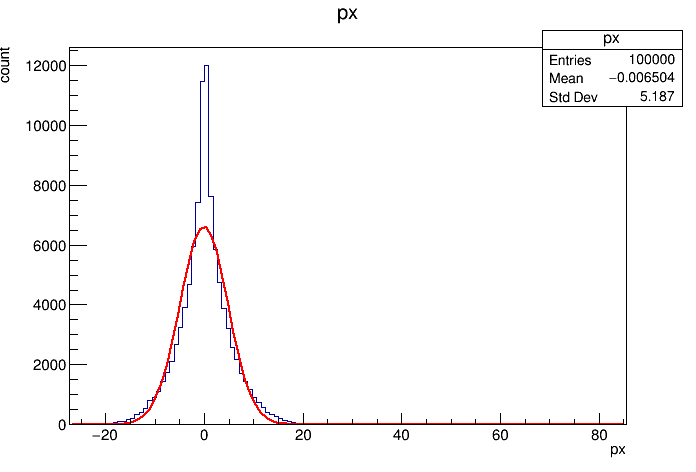

In [18]:
histdf->Draw();
canvas.Draw();

In [19]:
hist2df = dataframe.Histo2D({"histName", "histTitle", 100, 149, 151, 100, -20, 20},"ebeam","px");

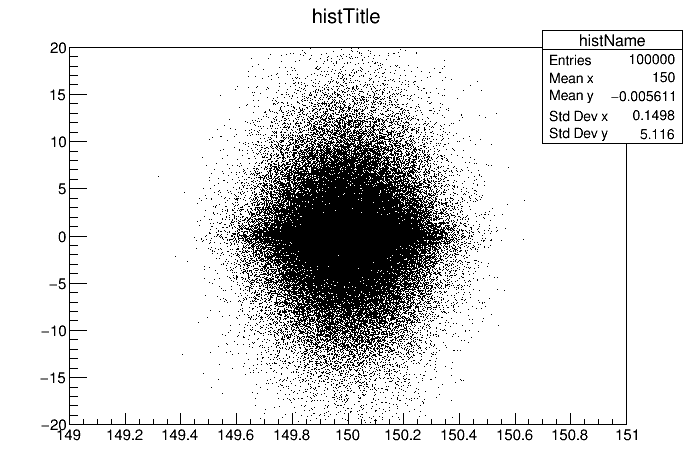

In [20]:
hist2df->Draw();
canvas.Draw();

In [21]:
histmodel = ROOT::RDF::TH2DModel()

(ROOT::RDF::TH2DModel &) @0x7f9d281b5000


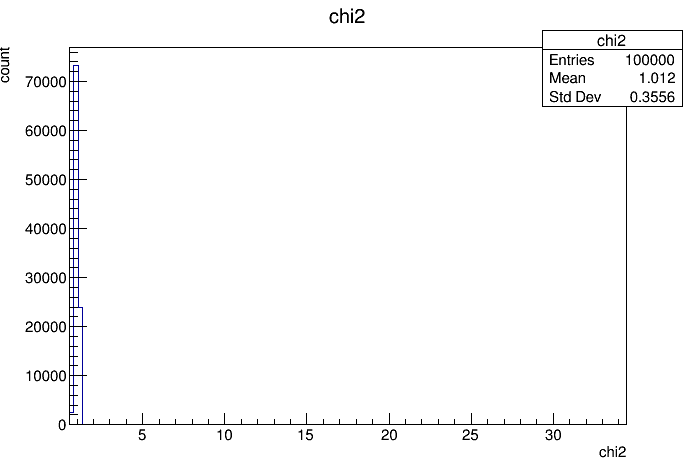

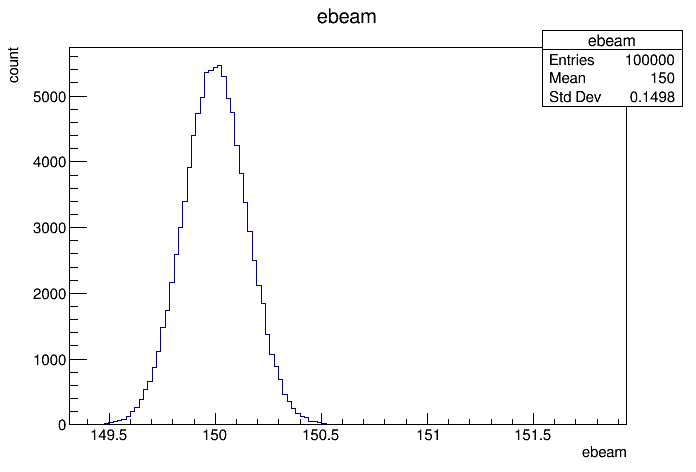

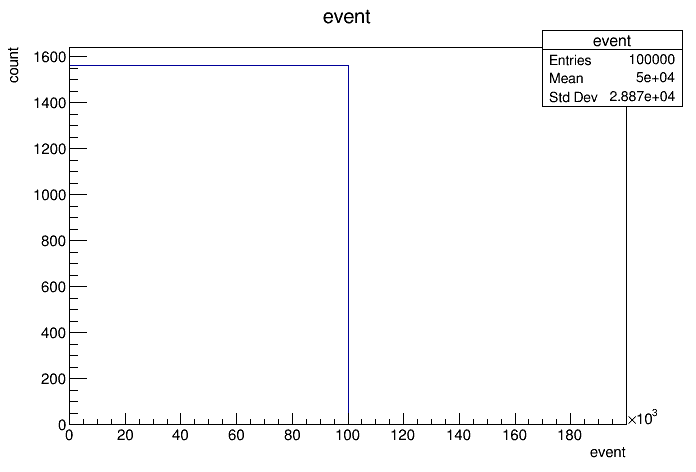

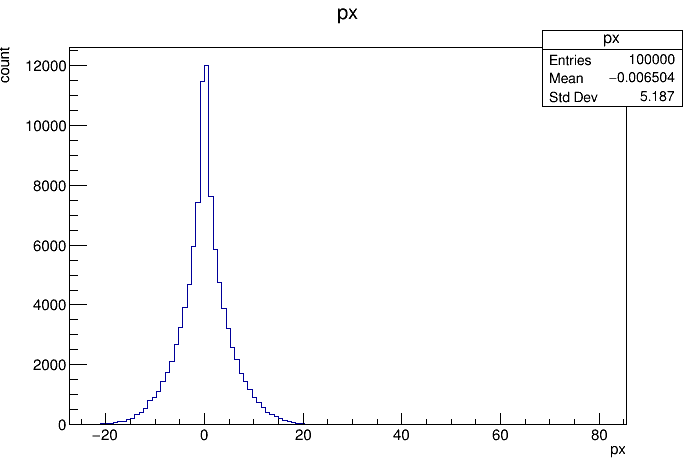

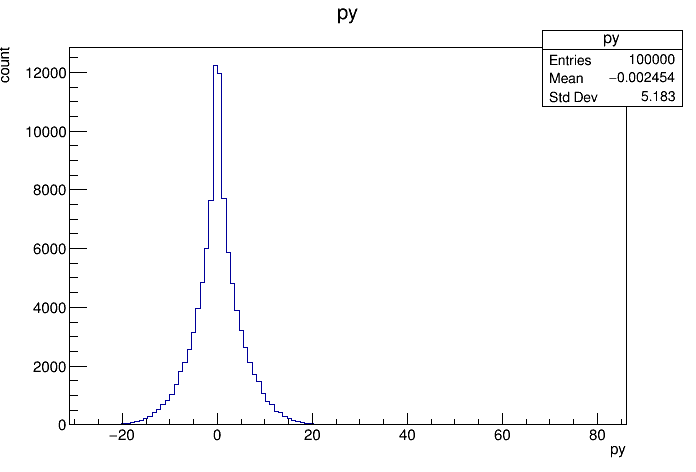

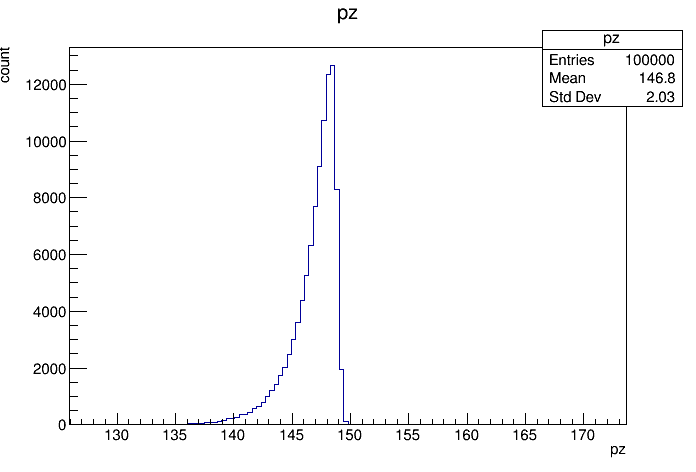

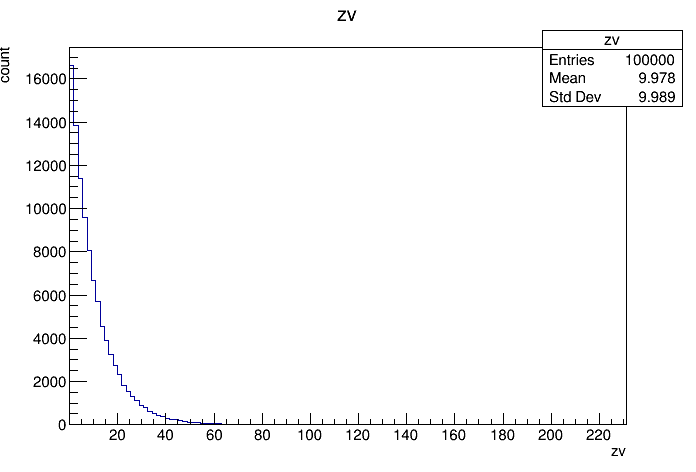

In [22]:
auto names = dataframe.GetColumnNames();
auto length = names.size();
std::vector<TCanvas> canvases(length);
std::vector<TH1D> histograms(length);
for ( int i = 0; i < length; ++i ) {
    histograms[i] = *(dataframe.Histo1D(names[i]));
}
for ( int i = 0; i < length; ++i ) {
    canvases[i].cd();
    histograms[i].Draw();
    canvases[i].Draw();
}

In [23]:
hist2df

(ROOT::RDF::RResultPtr<TH2D> &) @0x7f9d281ca000


In [24]:
auto eloss_df1 = dataframe.Define("eloss","eloss_func(ebeam,px,py,pz)").Histo1D("eloss");

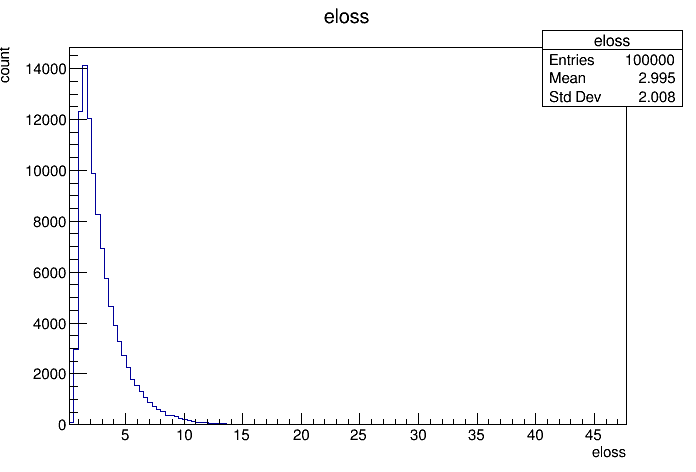

In [25]:
canvas.cd();
eloss_df1->Draw();
canvas.Draw();

In [26]:
definept = dataframe.Define("pt","sqrt(px*px + py*py)")

(ROOT::RDF::RInterface<ROOT::Detail::RDF::RLoopManager, void> &) @0x7f9d2817b000


In [27]:
double a = 3;
double b = 4;
auto c = sqrt(pow(a,2) + pow(b,2));
std::cout << c << std::endl;

5


In [28]:
pzcut = dataframe.Filter("pz < 145");
pzcount = pzcut.Count();
std::cout << "The number of events with pz < 145 is "
          << pzcount.GetValue() << std::endl;


The number of events with pz < 145 is 14962


In [29]:
pzcount

(ROOT::RDF::RResultPtr<unsigned long long> &) @0x7f9d2816c078
